# The usage of CLT/ Применение ЦПТ

Let's take some continuous distribution(Maxwell distibution is considered for this notebook)/ Возьмём любое непрерывное распределение(Распределение Максвелла для этого ноутбука)

We will take the sample of length 1000 and draw a histogram and PDF(probability distribution function)/Возьмём выборку объёмом 1000 и построим гистограмму и функцию плотности распределения

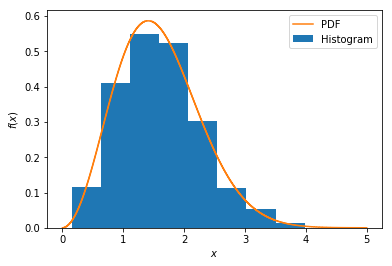

In [2]:
import numpy as np
from scipy import stats as sts
import matplotlib.pyplot as plt
from math import sqrt
maxwell_rv = sts.maxwell()  #initializing maxwell distribution/инициализируем распределение Максвелла
sample = maxwell_rv.rvs(1000) #Usage of method of maxwell() function rvs in order to generate sample
x = np.linspace(0, 5, 1000)
pdf = maxwell_rv.pdf(x) #definition of PDF/дефиниция ФПР
plt.hist(sample, density=True, label='Histogram')
plt.step(x, pdf, label='PDF')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

Now let's define the function called clt(arg), that takes one argument of length of sample and draws the histogram and PDF/Теперь зададим функцию clt(arg), которая принимает один аргумент объема выборки и сторит гистограмму для данного случая и функцию плотности распределения

In [3]:
def clt(arg):
    sample = []  #we will store values in list and than convert to np.array/мы будем хранить данные в листе, затем в матрицу
    for i in range(1000): #Generates 1000 samples with length arg/Генерирует 1000 выборок объемом arg
        sample.append(maxwell_rv.rvs(arg))
        sample[i] = np.mean(sample[i]) #Calculates the mean in each sample/Считает среднее в каждой выборке
    sample = np.array(sample)
    plt.hist(sample, density=True, label='Histogram for '+str(arg))
    plt.step(x, pdf, label='PDF')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend()

Let's try running for $n=5$/Попробуем для $n=5$

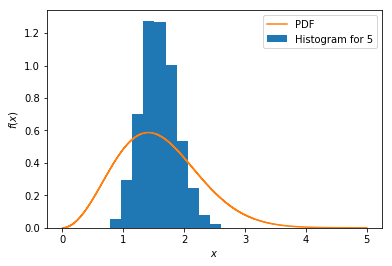

In [4]:
clt(5)

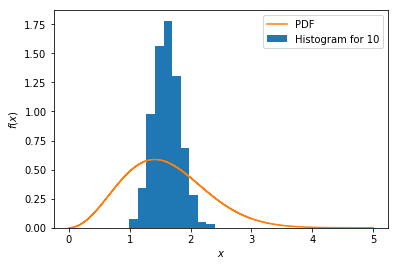

In [5]:
clt(10)

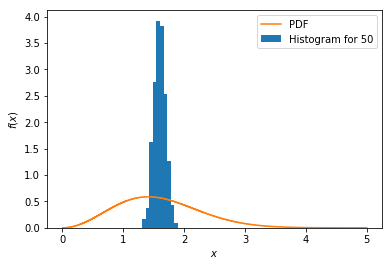

In [6]:
clt(50)

As it can be seen on the graph the histogram is looking more and more like normal distribution. According to CLT, properly normalized sum can be descirbed with normal distribution with parameters ($E[X]$ and $\sqrt{\frac{D[X]}{n}}$). In the next function, we will declare an updated version of clt(arg), called upd_clt(arg), that will also draw the PDF for normal distribution with modified parameters/Как может быть видно на графике, гистограмма все больше напоминает нормальное распределение. Согласно ЦПТ, сумма слабо зависимых случайных величин имеет распределение, близкое к нормальному с параметрами ($E[X]$ и $\sqrt{\frac{D[X]}{n}}$). В следующей функции, мы объявим улучшенную версию clt(arg), названную upd_clt(arg), которая будет строить PDF для нормального распределения с модифицированными параметрами

In [5]:
def upd_clt(arg):
    clt(arg)
    norm = sts.norm(loc=maxwell_rv.mean(), scale=sqrt(maxwell_rv.var()/arg))
    pdf_norm = norm.pdf(x)
    plt.step(x, pdf_norm, label='PDF for '+str(arg))
    plt.legend()

Let's try for $n=5, 10, 50$/Попробуем для $n=5, 10, 50$

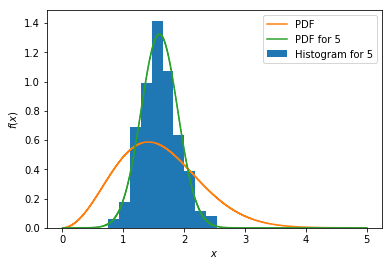

In [6]:
upd_clt(5)

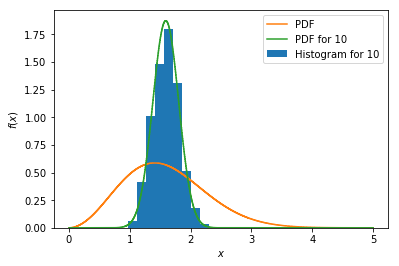

In [7]:
upd_clt(10)

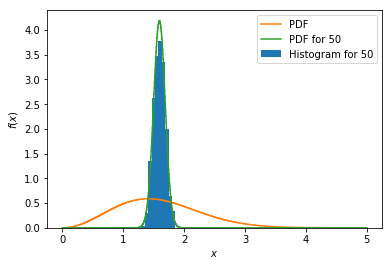

In [8]:
upd_clt(50)

As it could be seen from the graph as $n$ grows the accuracy of approximation grows too. While $n=5$ the difference is still visible and while $n=50$ the difference is slightly seen/Как это видно из графика, с ростом $n$ растет и точность аппроксимации. Пока $n=5$ разница еще видна, пока $n=50$ разница почти видна